<>:49: SyntaxWarning: invalid escape sequence '\$'
<>:49: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-2233757367.py:49: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)


Step 1: Importing Data...
Successfully loaded data. Shape: (96651, 79)
       id                          listing_url       scrape_id last_scraped  \
0  264776  https://www.airbnb.com/rooms/264776  20250610032232   2025-06-11   
1  264777  https://www.airbnb.com/rooms/264777  20250610032232   2025-06-11   
2  264778  https://www.airbnb.com/rooms/264778  20250610032232   2025-06-11   
3  264779  https://www.airbnb.com/rooms/264779  20250610032232   2025-06-11   
4  264780  https://www.airbnb.com/rooms/264780  20250610032232   2025-06-11   

        source                                             name  \
0  city scrape                      Huge Four Bedroom Apartment   
1  city scrape                            One Bedroom Apartment   
2  city scrape          Two Bedroom Newly Refurbished Apartment   
3  city scrape                Refurbished Two Bedroom Apartment   
4  city scrape  Spacious refurbished 2 bedroom apt with balcony   

                                         descriptio

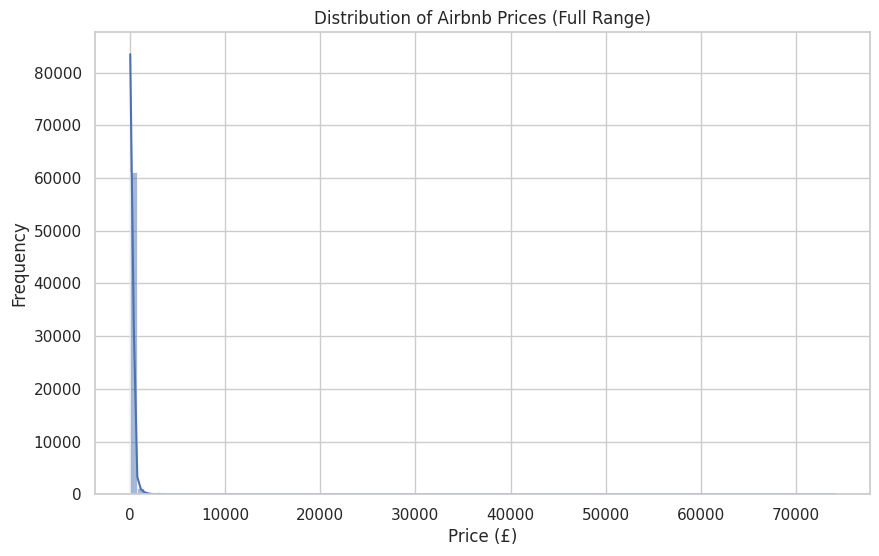

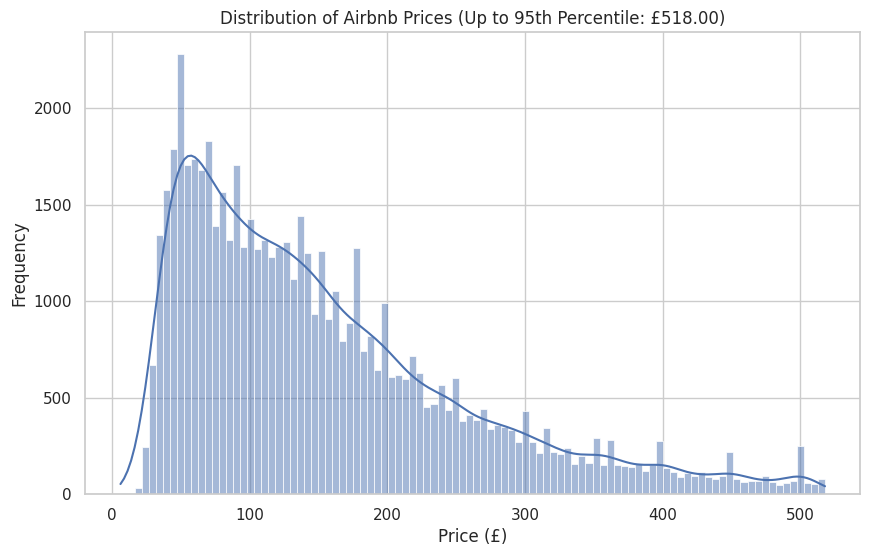

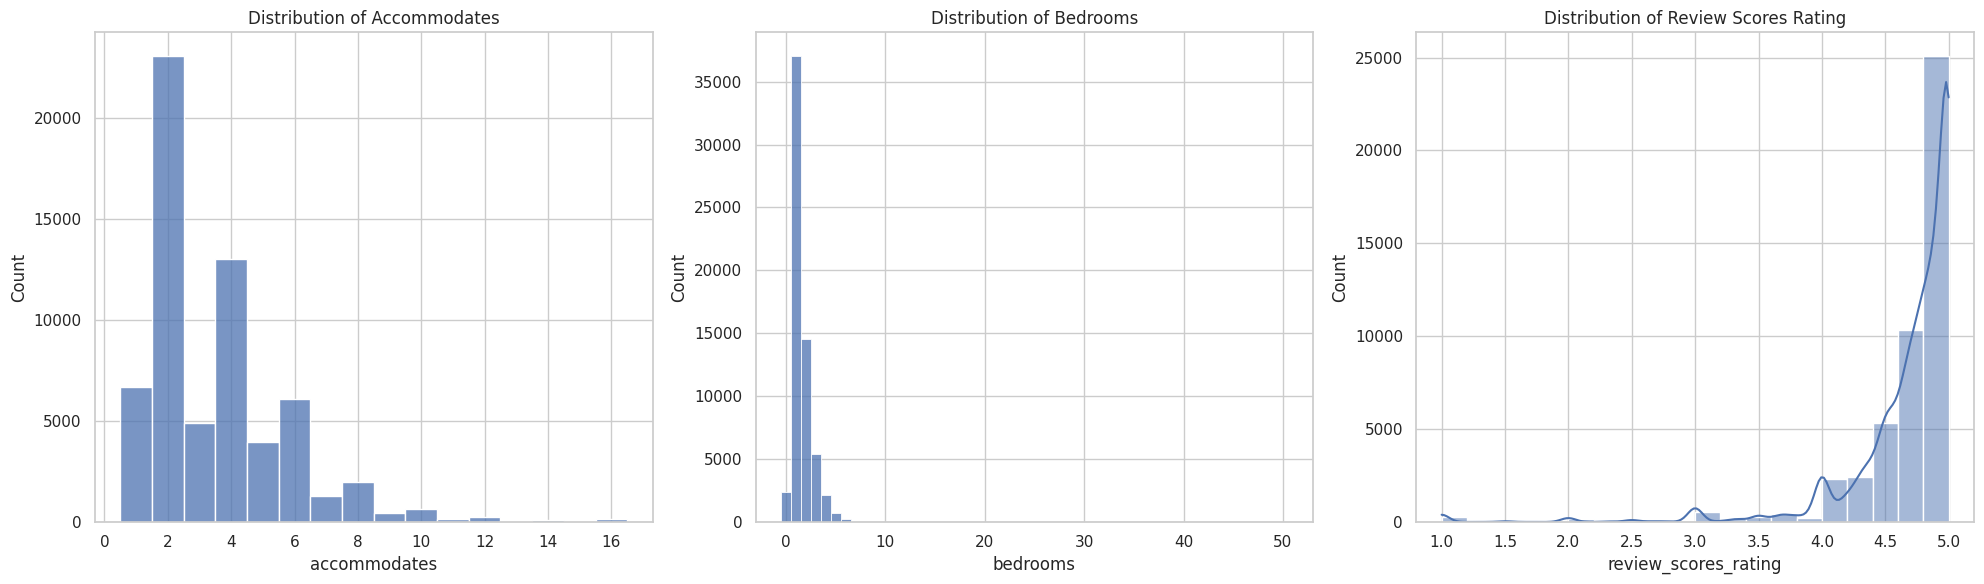

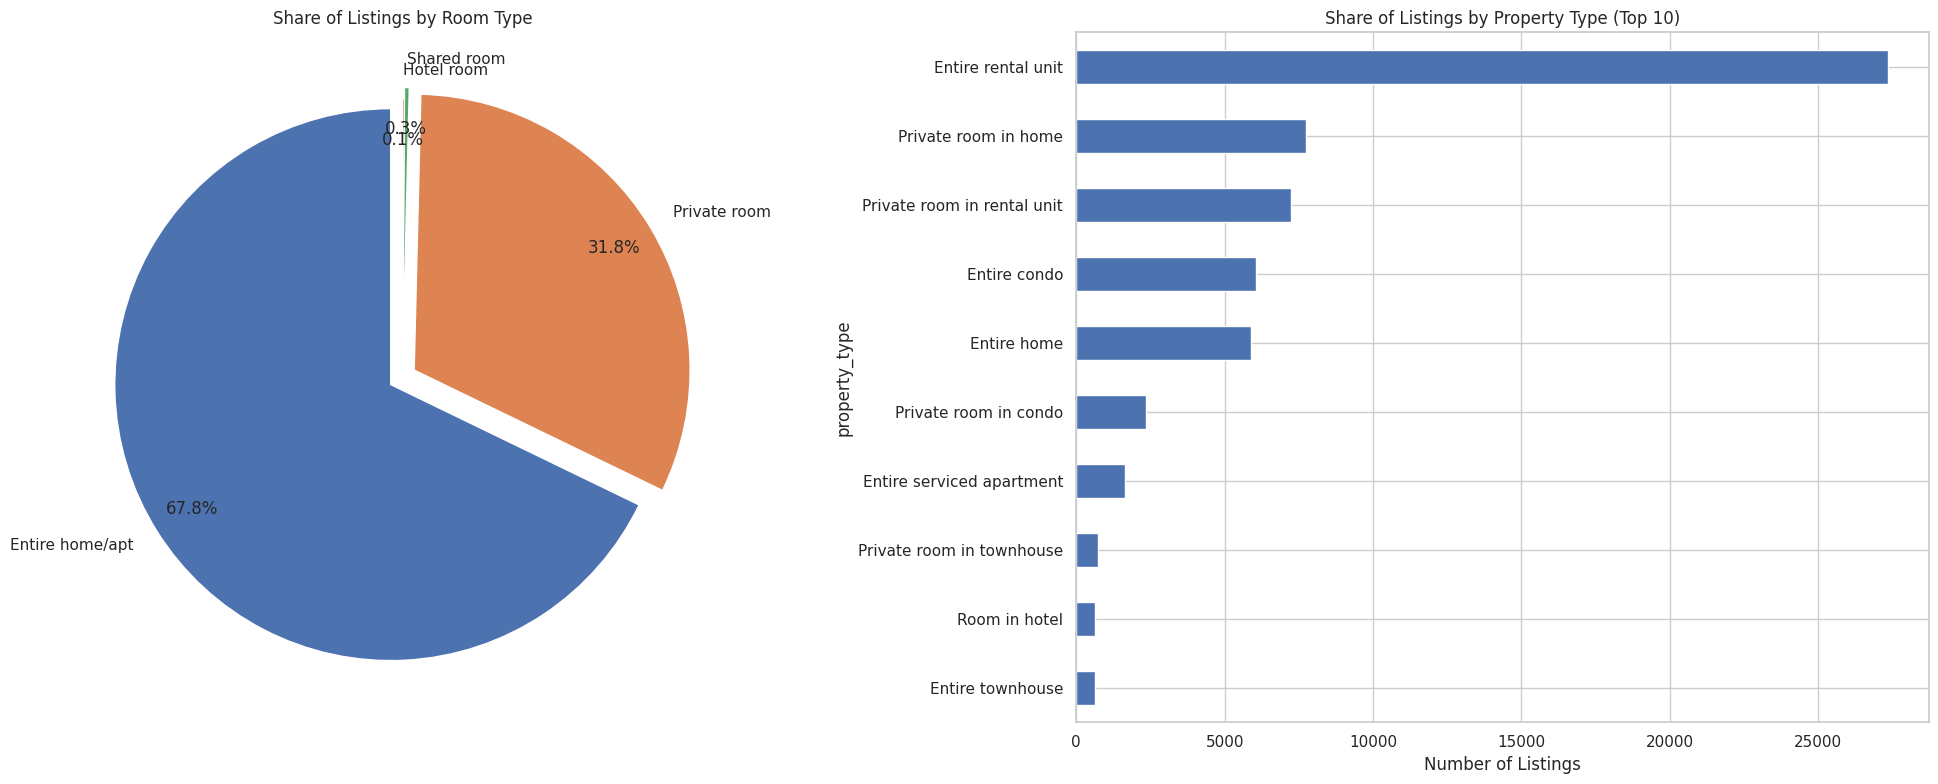


Step 4: Performing Multivariate Analysis...


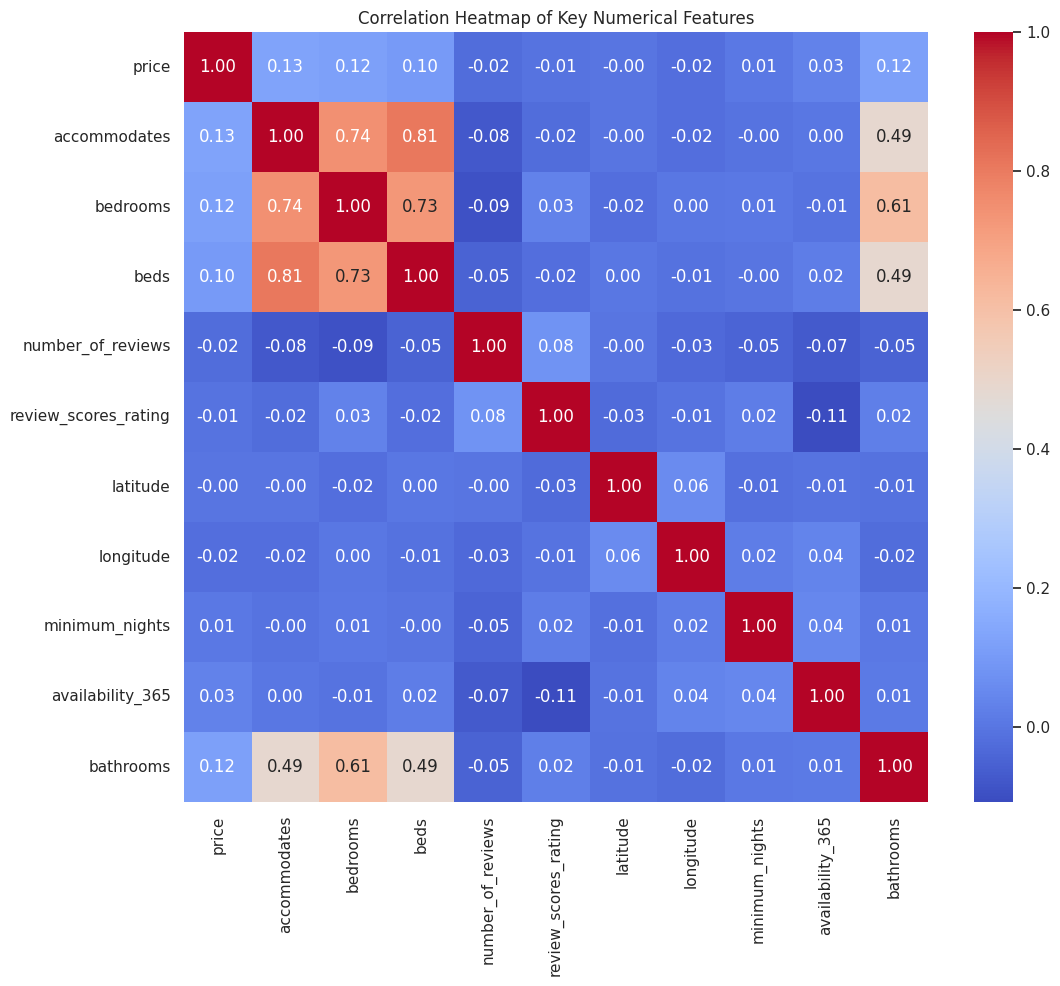

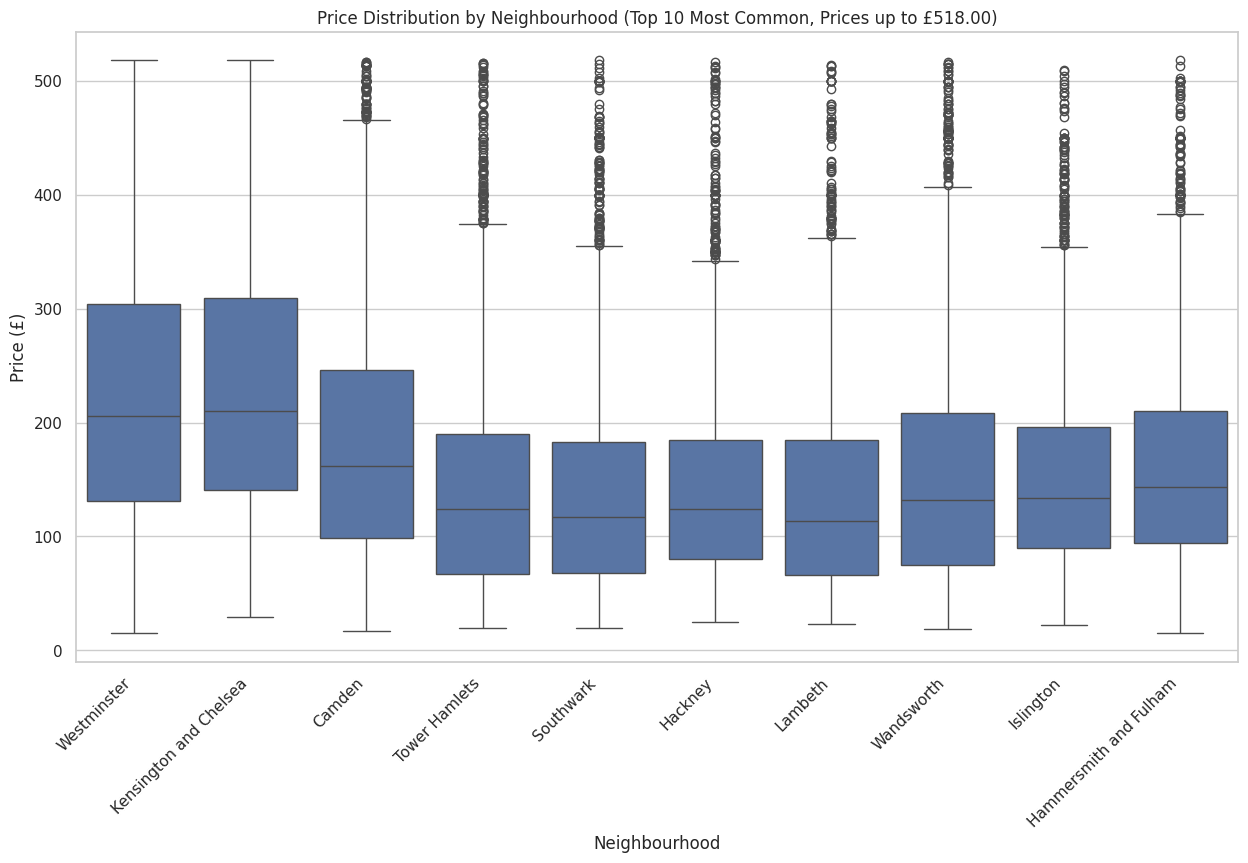


EDA complete. All plots have been generated.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better visuals
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

def run_eda():
    """
    Main function to run the entire EDA pipeline.
    """

    # --- 1. Import Data ---
    print("Step 1: Importing Data...")
    try:
        # Load the dataset. Assuming the file is in the same directory.
        # The user uploaded 'listings.csv.gz', but the path might just be 'listings.csv'
        # if it was unzipped. We'll try 'listings.csv.gz' first, then 'listings.csv'.
        try:
            df = pd.read_csv('listings.csv.gz', compression='gzip')
        except FileNotFoundError:
            try:
                df = pd.read_csv('listings.csv')
            except FileNotFoundError:
                print("Error: listings.csv.gz or listings.csv not found.")
                print("Please make sure the dataset is in the same directory as this script.")
                return

        print(f"Successfully loaded data. Shape: {df.shape}")
        print(df.head())
    except Exception as e:
        print(f"An error occurred while loading the data: {e}")
        return

    # --- 6. Data Cleaning & Manipulation (Partial - Moved up) ---
    # We must clean 'price' before we can analyze it numerically.
    # This was part of step 6 in our plan, but it's needed now.
    print("\nStep 6 (Partial): Cleaning 'price' column...")
    if 'price' in df.columns:
        # Check for missing prices before conversion
        print(f"Price' total values before cleaning: {df['price']}")
        print(f"Missing 'price' values before cleaning: {df['price'].isna().sum()}")

        # Convert price from string (e.g., "$150.00") to numeric
        # 1. Remove '$' and ','
        # 2. Convert to numeric, setting errors='coerce' will turn unparseable values into NaN
        df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)


        # Drop rows where price is missing, as we can't predict them
        df.dropna(subset=['price'], inplace=True)
        print(f"Missing 'price' values after cleaning: {df['price'].isna().sum()}")

        print("'price' column cleaned and converted to numeric.")
    else:
        print("Error: 'price' column not found in the dataset.")
        return

    # --- 2. Check for Missing Values ---
    print("\nStep 2: Checking for Missing Values (Top 20)...")
    missing_values = df.isna().sum().sort_values(ascending=False)
    print(missing_values[missing_values > 0].head(20))

    # --- 3. Univariate Analysis (One Variable) ---
    print("\nStep 3: Performing Univariate Analysis...")

    # Target Variable (price)
    plt.figure()
    sns.histplot(df['price'], bins=100, kde=True)
    plt.title('Distribution of Airbnb Prices (Full Range)')
    plt.xlabel('Price (£)')
    plt.ylabel('Frequency')
    plt.show()

    # The price is heavily skewed. Let's look at the 95th percentile to see the main distribution.
    p_95 = df['price'].quantile(0.95)
    plt.figure()
    sns.histplot(df[df['price'] <= p_95]['price'], bins=100, kde=True)
    plt.title(f'Distribution of Airbnb Prices (Up to 95th Percentile: £{p_95:.2f})')
    plt.xlabel('Price (£)')
    plt.ylabel('Frequency')
    plt.show()

    # Key Numerical Features
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    sns.histplot(df['accommodates'], ax=axes[0], discrete=True, kde=False)
    axes[0].set_title('Distribution of Accommodates')

    sns.histplot(df['bedrooms'].dropna(), ax=axes[1], discrete=True, kde=False)
    axes[1].set_title('Distribution of Bedrooms')

    sns.histplot(df['review_scores_rating'].dropna(), ax=axes[2], bins=20, kde=True)
    axes[2].set_title('Distribution of Review Scores Rating')
    plt.tight_layout()
    plt.show()

    # Key Categorical Features (Pie & Bar Charts)
    fig, axes = plt.subplots(1, 2, figsize=(20, 8)) # Adjusted figure size

    # Pie chart for 'room_type'
    room_type_counts = df['room_type'].value_counts()

    # Create an 'explode' tuple to separate the main slices for readability
    labels = room_type_counts.index.tolist()
    explode_values = [0.01] * len(labels)  # Default small separation

    # Find the index of the main categories and set a larger explode value
    # We use .index() in a try-except block in case a category isn't present
    try:
        # Find index for 'Entire home/apt' and explode it
        entire_home_idx = labels.index('Entire home/apt')
        explode_values[entire_home_idx] = 0.05
    except ValueError:
        pass # Category not present

    try:
        # Find index for 'Private room' and explode it
        private_room_idx = labels.index('Private room')
        explode_values[private_room_idx] = 0.05
    except ValueError:
        pass # Category not present

    try:
        # Find index for 'Shared room' and explode it
        shared_room_idx = labels.index('Shared room')
        explode_values[shared_room_idx] = 0.05
    except ValueError:
        pass # Category not present

    explode = tuple(explode_values)  # Convert back to tuple

    axes[0].pie(room_type_counts,
                labels=labels,
                autopct='%1.1f%%',
                startangle=90,
                pctdistance=0.85,  # Move percentages further from the center
                explode=explode)     # Add separation between slices

    axes[0].set_title('Share of Listings by Room Type')

    # Bar chart for 'property_type' (Top 10) - Changed from pie to bar for readability
    prop_type_counts = df['property_type'].value_counts()
    top_10_props = prop_type_counts.head(10).sort_values(ascending=True) # Sort for h-bar

    top_10_props.plot(kind='barh', ax=axes[1])
    axes[1].set_title('Share of Listings by Property Type (Top 10)')
    axes[1].set_xlabel('Number of Listings')

    plt.tight_layout()
    plt.show()

    # --- 4. Multivariate Analysis (Multiple Variables) ---
    print("\nStep 4: Performing Multivariate Analysis...")

    # Correlation Heat Map
    # Select key numerical features for the heatmap
    numerical_features = [
        'price', 'accommodates', 'bedrooms', 'beds', 'bathrooms_text',
        'number_of_reviews', 'review_scores_rating',
        'latitude', 'longitude', 'minimum_nights', 'availability_365'
    ]

    # 'bathrooms_text' needs cleaning first (e.g., "1.5 baths" -> 1.5)
    # This is another part of Step 6 (Data Cleaning)
    if 'bathrooms_text' in df.columns:
        # Use regex to find the first number (integer or float)
        df['bathrooms'] = df['bathrooms_text'].str.extract(r'(\d+\.?\d*)').astype(float)
        numerical_features.remove('bathrooms_text')
        numerical_features.append('bathrooms')

    # Create the correlation matrix
    corr_matrix = df[numerical_features].corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
    plt.title('Correlation Heatmap of Key Numerical Features')
    plt.show()

    # Visual Patterns: Box Plots (Price vs. Neighbourhood)
    # This can be very noisy with too many neighbourhoods. Let's find the top 10.
    top_10_neighbourhoods = df['neighbourhood_cleansed'].value_counts().head(10).index

    # Filter the DataFrame to only include these top 10 neighbourhoods
    df_top_10 = df[df['neighbourhood_cleansed'].isin(top_10_neighbourhoods)]

    # We will also use the filtered price to make the box plot readable
    df_top_10_filtered = df_top_10[df_top_10['price'] <= p_95]

    plt.figure(figsize=(15, 10)) # Increased height for labels
    sns.boxplot(
        data=df_top_10_filtered,
        x='neighbourhood_cleansed',
        y='price',
        order=top_10_neighbourhoods
    )
    plt.title(f'Price Distribution by Neighbourhood (Top 10 Most Common, Prices up to £{p_95:.2f})')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Neighbourhood')
    plt.ylabel('Price (£)')

    # Adjust layout to prevent labels from being cut off
    plt.subplots_adjust(bottom=0.25)
    plt.show()

    print("\nEDA complete. All plots have been generated.")

if __name__ == "__main__":
    run_eda()


